# Revenue & Expenses of Water & Sewerage Treatment Plants in Malaysia, Financial Year 2014 - 2016

This Notebook will analyze and attempt to plot some of the analyses done on the revenue and expenses reported for selected water treatment plants (WTP) and sewerage plants (SP) in Malaysia for the financial years 2014 to 2016.

The data can be obtained from data.gov.my through the link: https://www.data.gov.my/data/ms_MY/dataset/revenue-vs-total-expenditure-for-water-supply-and-sewerage

Courtesy of: Muhammad Azammuddin bin Suratem (@azamsuratem on GitHub)

In [1]:
import numpy as np
import pandas as pd
import math

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('default')

import seaborn as sns
sns.set()

In [2]:
financials = pd.read_csv('data/revenue-vs-total-expenditure-for-water-supply-and-sewerage2.csv', header=2)

In [3]:
financials.head()

,Water/Sewerage,State,Year,Total Revenue (RM '000),Total Expenditure (RM '000),Total Surplus or Deficit (RM '000),Total Expenditure/Total Revenue (%)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Water,Johor,2014.0,"853,527","763,017","90,509",89.0
3,Water,Kedah,2014.0,"290,591","264,198","26,393",91.0
4,Water,Kelantan,2014.0,"98,410","97,580",830,99.0


In [4]:
financials.tail()

,Water/Sewerage,State,Year,Total Revenue (RM '000),Total Expenditure (RM '000),Total Surplus or Deficit (RM '000),Total Expenditure/Total Revenue (%)
73,Sewerage,Perlis,2016.0,"2,229","3,409","(1,180)",153.0
74,Sewerage,P. Pinang,2016.0,"62,976","87,049","(24,073)",138.0
75,Sewerage,Selangor,2016.0,"386,184","554,579","(168,395)",144.0
76,Sewerage,Terengganu,2016.0,"5,536","13,766","(8,230)",249.0
77,Sewerage,F.T. Labuan,2016.0,"1,926","5,086","(3,160)",264.0


In [5]:
financials = financials.drop([0,1])
financials = financials.reset_index()

In [6]:
financials.head()

,index,Water/Sewerage,State,Year,Total Revenue (RM '000),Total Expenditure (RM '000),Total Surplus or Deficit (RM '000),Total Expenditure/Total Revenue (%)
0,2,Water,Johor,2014.0,"853,527","763,017","90,509",89.0
1,3,Water,Kedah,2014.0,"290,591","264,198","26,393",91.0
2,4,Water,Kelantan,2014.0,"98,410","97,580",830,99.0
3,5,Water,Labuan,2014.0,"16,241","27,752","-11,511",171.0
4,6,Water,Melaka,2014.0,"184,292","178,883","5,409",97.0


In [7]:
financials = financials.drop(['index'], axis=1)

In [8]:
financials.head()

,Water/Sewerage,State,Year,Total Revenue (RM '000),Total Expenditure (RM '000),Total Surplus or Deficit (RM '000),Total Expenditure/Total Revenue (%)
0,Water,Johor,2014.0,"853,527","763,017","90,509",89.0
1,Water,Kedah,2014.0,"290,591","264,198","26,393",91.0
2,Water,Kelantan,2014.0,"98,410","97,580",830,99.0
3,Water,Labuan,2014.0,"16,241","27,752","-11,511",171.0
4,Water,Melaka,2014.0,"184,292","178,883","5,409",97.0


In [9]:
financials.describe()

,Year,Total Expenditure/Total Revenue (%)
count,76.000000,76.000000
mean,2015.013158,147.684211
std,0.824515,69.828783
min,2014.000000,58.000000
25%,2014.000000,95.750000
50%,2015.000000,135.500000
75%,2016.000000,178.000000
max,2016.000000,440.000000


In [10]:
financials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Water/Sewerage                       76 non-null     object 
 1   State                                76 non-null     object 
 2   Year                                 76 non-null     float64
 3   Total Revenue (RM '000)              76 non-null     object 
 4   Total Expenditure (RM '000)          76 non-null     object 
 5   Total Surplus or Deficit (RM '000)   76 non-null     object 
 6   Total Expenditure/Total Revenue (%)  76 non-null     float64
dtypes: float64(2), object(5)
memory usage: 4.3+ KB


In [11]:
financials.describe(include=['object'])

,Water/Sewerage,State,Total Revenue (RM '000),Total Expenditure (RM '000),Total Surplus or Deficit (RM '000)
count,76,76,76,76,76
unique,2,16,76,76,75
top,Water,Melaka,"263,605","29,262","(29,306)"
freq,42,6,1,1,2


In [12]:
financials.describe(include=['object','float64'])

,Water/Sewerage,State,Year,Total Revenue (RM '000),Total Expenditure (RM '000),Total Surplus or Deficit (RM '000),Total Expenditure/Total Revenue (%)
count,76,76,76.000000,76,76,76,76.000000
unique,2,16,NaN,76,76,75,NaN
top,Water,Melaka,NaN,"263,605","29,262","(29,306)",NaN
freq,42,6,NaN,1,1,2,NaN
mean,NaN,NaN,2015.013158,NaN,NaN,NaN,147.684211
std,NaN,NaN,0.824515,NaN,NaN,NaN,69.828783
min,NaN,NaN,2014.000000,NaN,NaN,NaN,58.000000
25%,NaN,NaN,2014.000000,NaN,NaN,NaN,95.750000
50%,NaN,NaN,2015.000000,NaN,NaN,NaN,135.500000
75%,NaN,NaN,2016.000000,NaN,NaN,NaN,178.000000


In [13]:
financials.groupby('State').describe().transpose()

State                                      F.T. Labuan        Johor  \
Year                                count     3.000000     6.000000   
                                    mean   2015.000000  2015.000000   
                                    std       1.000000     0.894427   
                                    min    2014.000000  2014.000000   
                                    25%    2014.500000  2014.250000   
                                    50%    2015.000000  2015.000000   
                                    75%    2015.500000  2015.750000   
                                    max    2016.000000  2016.000000   
Total Expenditure/Total Revenue (%) count     3.000000     6.000000   
                                    mean    358.333333   118.500000   
                                    std      88.681077    35.528862   
                                    min     264.000000    84.000000   
                                    25%     317.500000    88.250000   
                                    50%     371.000000   112.500000   
                                    75%     405.500000   148.000000   
                                    max     440.000000   162.000000   

State                                            Kedah     Kelantan  \
Year                                count     6.000000     4.000000   
                                    mean   2015.000000  2015.250000   
                                    std       0.894427     0.957427   
                                    min    2014.000000  2014.000000   
                                    25%    2014.250000  2014.750000   
                                    50%    2015.000000  2015.500000   
                                    75%    2015.750000  2016.000000   
                                    max    2016.000000  2016.000000   
Total Expenditure/Total Revenue (%) count     6.000000     4.000000   
                                    mean    147.333333   101.500000   
                                    std      60.400883     6.403124   
                                    min      91.000000    97.000000   
                                    25%      94.000000    98.500000   
                                    50%     136.500000    99.000000   
                                    75%     203.000000   102.000000   
                                    max     215.000000   111.000000   

State                                           Labuan       Melaka  \
Year                                count     3.000000     6.000000   
                                    mean   2015.000000  2015.000000   
                                    std       1.000000     0.894427   
                                    min    2014.000000  2014.000000   
                                    25%    2014.500000  2014.250000   
                                    50%    2015.000000  2015.000000   
                                    75%    2015.500000  2015.750000   
                                    max    2016.000000  2016.000000   
Total Expenditure/Total Revenue (%) count     3.000000     6.000000   
                                    mean    128.666667   162.000000   
                                    std      38.135723    75.097270   
                                    min      97.000000    95.000000   
                                    25%     107.500000    95.500000   
                                    50%     118.000000   146.000000   
                                    75%     144.500000   226.500000   
                                    max     171.000000   253.000000   

State                                      N. Sembilan    P. Pinang  \
Year                                count     6.000000     3.000000   
                                    mean   2015.000000  2015.000000   
                                    std       0.894427     1.000000   
                                    min    2014.000000  2014.000000   
                     

In [14]:
financials.groupby('Year').describe().transpose()

Year                                           2014.0      2015.0      2016.0
Total Expenditure/Total Revenue (%) count   25.000000   25.000000   26.000000
                                    mean   157.240000  152.320000  134.038462
                                    std     80.152604   76.799913   49.919520
                                    min     74.000000   58.000000   69.000000
                                    25%     97.000000   95.000000   97.000000
                                    50%    135.000000  140.000000  133.000000
                                    75%    196.000000  194.000000  153.750000
                                    max    440.000000  371.000000  264.000000

In [16]:
financials['Year'] = financials['Year'].astype('int64')
financials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Water/Sewerage                       76 non-null     object 
 1   State                                76 non-null     object 
 2   Year                                 76 non-null     int64  
 3   Total Revenue (RM '000)              76 non-null     object 
 4   Total Expenditure (RM '000)          76 non-null     object 
 5   Total Surplus or Deficit (RM '000)   76 non-null     object 
 6   Total Expenditure/Total Revenue (%)  76 non-null     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 4.3+ KB


In [17]:
financials['Year'] = financials['Year'].astype('str')
financials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Water/Sewerage                       76 non-null     object 
 1   State                                76 non-null     object 
 2   Year                                 76 non-null     object 
 3   Total Revenue (RM '000)              76 non-null     object 
 4   Total Expenditure (RM '000)          76 non-null     object 
 5   Total Surplus or Deficit (RM '000)   76 non-null     object 
 6   Total Expenditure/Total Revenue (%)  76 non-null     float64
dtypes: float64(1), object(6)
memory usage: 4.3+ KB


In [18]:
financials["Total Revenue (RM '000)"] = financials["Total Revenue (RM '000)"].astype(str).str.replace(",","")
financials["Total Expenditure (RM '000)"] = financials["Total Expenditure (RM '000)"].astype(str).str.replace(",","")
financials["Total Surplus or Deficit (RM '000)"] = financials["Total Surplus or Deficit (RM '000)"].astype(str).str.replace(",","")
financials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Water/Sewerage                       76 non-null     object 
 1   State                                76 non-null     object 
 2   Year                                 76 non-null     object 
 3   Total Revenue (RM '000)              76 non-null     object 
 4   Total Expenditure (RM '000)          76 non-null     object 
 5   Total Surplus or Deficit (RM '000)   76 non-null     object 
 6   Total Expenditure/Total Revenue (%)  76 non-null     float64
dtypes: float64(1), object(6)
memory usage: 4.3+ KB


In [19]:
pd.Series(['(2000)','2000',np.nan]).str.replace("(","-").str.replace(")","")

0    -2000
1     2000
2      NaN
dtype: object

In [20]:
financials["Total Revenue (RM '000)"] = financials["Total Revenue (RM '000)"].str.replace("(","-").str.replace(")","")
financials["Total Expenditure (RM '000)"] = financials["Total Expenditure (RM '000)"].str.replace("(","-").str.replace(")","")
financials["Total Surplus or Deficit (RM '000)"] = financials["Total Surplus or Deficit (RM '000)"].str.replace("(","-").str.replace(")","")
financials.tail(10)

,Water/Sewerage,State,Year,Total Revenue (RM '000),Total Expenditure (RM '000),Total Surplus or Deficit (RM '000),Total Expenditure/Total Revenue (%)
66,Sewerage,Kelantan,2016,2422,2677,-255,111.0
67,Sewerage,Melaka,2016,19981,39042,-19061,195.0
68,Sewerage,N. Sembilan,2016,34268,55100,-20833,161.0
69,Sewerage,Pahang,2016,18275,27578,-9303,151.0
70,Sewerage,Perak,2016,45457,80445,-34989,177.0
71,Sewerage,Perlis,2016,2229,3409,-1180,153.0
72,Sewerage,P. Pinang,2016,62976,87049,-24073,138.0
73,Sewerage,Selangor,2016,386184,554579,-168395,144.0
74,Sewerage,Terengganu,2016,5536,13766,-8230,249.0
75,Sewerage,F.T. Labuan,2016,1926,5086,-3160,264.0


In [21]:
financials["Total Revenue (RM '000)"] = financials["Total Revenue (RM '000)"].astype('int64')
financials["Total Expenditure (RM '000)"] = financials["Total Expenditure (RM '000)"].astype('int64')
financials["Total Surplus or Deficit (RM '000)"] = financials["Total Surplus or Deficit (RM '000)"].astype('int64')
financials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Water/Sewerage                       76 non-null     object 
 1   State                                76 non-null     object 
 2   Year                                 76 non-null     object 
 3   Total Revenue (RM '000)              76 non-null     int64  
 4   Total Expenditure (RM '000)          76 non-null     int64  
 5   Total Surplus or Deficit (RM '000)   76 non-null     int64  
 6   Total Expenditure/Total Revenue (%)  76 non-null     float64
dtypes: float64(1), int64(3), object(3)
memory usage: 4.3+ KB


In [22]:
financials.groupby('Water/Sewerage').describe().transpose()

Water/Sewerage                                  Sewerage         Water
Total Revenue (RM '000)             count      34.000000  4.200000e+01
                                    mean    55178.441176  3.853554e+05
                                    std    101409.912906  5.173434e+05
                                    min      1793.000000  1.624100e+04
                                    25%      5588.500000  1.292972e+05
                                    50%     25976.000000  2.464285e+05
                                    75%     44879.250000  3.114778e+05
                                    max    386184.000000  2.094734e+06
Total Expenditure (RM '000)         count      34.000000  4.200000e+01
                                    mean    87404.000000  4.232916e+05
                                    std    139968.105972  6.651001e+05
                                    min      2677.000000  2.323800e+04
                                    25%     13834.750000  1.239575e+05
                                    50%     52580.500000  2.521570e+05
                                    75%     78311.500000  2.823260e+05
                                    max    554579.000000  2.832998e+06
Total Surplus or Deficit (RM '000)  count      34.000000  4.200000e+01
                                    mean   -32225.617647 -3.793617e+04
                                    std     39866.497729  1.830215e+05
                                    min   -168395.000000 -7.382640e+05
                                    25%    -30281.000000 -6.804250e+03
                                    50%    -23158.000000  6.782500e+03
                                    75%     -8451.250000  3.157825e+04
                                    max      -255.000000  1.465750e+05
Total Expenditure/Total Revenue (%) count      34.000000  4.200000e+01
                                    mean      199.823529  1.054762e+02
                                    std        68.968359  3.180830e+01
                                    min       111.000000  5.800000e+01
                                    25%       151.250000  8.725000e+01
                                    50%       181.500000  9.650000e+01
                                    75%       235.500000  1.232500e+02
                                    max       440.000000  1.990000e+02

In [23]:
financials.groupby('Year').describe().transpose()

Year                                               2014          2015  \
Total Revenue (RM '000)             count  2.500000e+01  2.500000e+01   
                                    mean   2.273853e+05  2.410403e+05   
                                    std    4.180867e+05  4.359784e+05   
                                    min    1.793000e+03  2.297000e+03   
                                    25%    2.529200e+04  2.666000e+04   
                                    50%    9.841000e+04  9.872900e+04   
                                    75%    2.636050e+05  2.812930e+05   
                                    max    2.023915e+06  2.094734e+06   
Total Expenditure (RM '000)         count  2.500000e+01  2.500000e+01   
                                    mean   2.671385e+05  2.794929e+05   
                                    std    5.126589e+05  5.625470e+05   
                                    min    3.208000e+03  3.856000e+03   
                                    25%    4.515000e+04  4.832100e+04   
                                    50%    1.039040e+05  1.046430e+05   
                                    75%    2.525020e+05  2.599110e+05   
                                    max    2.571556e+06  2.832998e+06   
Total Surplus or Deficit (RM '000)  count  2.500000e+01  2.500000e+01   
                                    mean  -3.975320e+04 -3.845260e+04   
                                    std    1.224809e+05  1.590445e+05   
                                    min   -5.476420e+05 -7.382640e+05   
                                    25%   -2.930600e+04 -3.060600e+04   
                                    50%   -7.552000e+03 -6.236000e+03   
                                    75%    5.409000e+03  8.926000e+03   
                                    max    9.050900e+04  1.465750e+05   
Total Expenditure/Total Revenue (%) count  2.500000e+01  2.500000e+01   
                                    mean   1.572400e+02  1.523200e+02   
                                    std    8.015260e+01  7.679991e+01   
                                    min    7.400000e+01  5.800000e+01   
                                    25%    9.700000e+01  9.500000e+01   
                                    50%    1.350000e+02  1.400000e+02   
                                    75%    1.960000e+02  1.940000e+02   
                                    max    4.400000e+02  3.710000e+02   

Year                                               2016  
Total Revenue (RM '000)             count  2.600000e+01  
                                    mean   2.442443e+05  
                                    std    4.289583e+05  
                                    min    1.926000e+03  
                                    25%    2.958650e+04  
                                    50%    9.045800e+04  
                                    75%    2.996568e+05  
                                    max    2.040494e+06  
Total Expenditure (RM '000)         count  2.600000e+01  
                                    mean   2.724692e+05  
                                    std    5.290909e+05  
                                    min    2.677000e+03  
                                    25%    3.907450e+04  
                                    50%    1.007610e+05  
                                    75%    2.715000e+05  
                                    max    2.656842e+06  
Total Surplus or Deficit (RM '000)  count  2.600000e+01  
                                    mean  -2.822481e+04  
                                    std    1.352428e+05  
                                    min   -6.163480e+05  
                                    25%   -2.189050e+04  
                                    50%   -5.459000e+03  
                                    75%    6.962000e+03  
                                    max    1.278140e+05  
Total Expenditure/Total Revenue (%) count  2.600000e+01  
                                    mean   1.340385e+02  
                        

In [24]:
financials.groupby('State').describe().transpose()

State                                      F.T. Labuan         Johor  \
Total Revenue (RM '000)             count     3.000000  6.000000e+00   
                                    mean   2005.333333  4.975132e+05   
                                    std     261.197882  4.973276e+05   
                                    min    1793.000000  4.314600e+04   
                                    25%    1859.500000  4.833800e+04   
                                    50%    1926.000000  4.524235e+05   
                                    75%    2111.500000  9.151380e+05   
                                    max    2297.000000  1.054067e+06   
Total Expenditure (RM '000)         count     3.000000  6.000000e+00   
                                    mean   7171.000000  4.483368e+05   
                                    std    1833.711809  4.175451e+05   
                                    min    5086.000000  6.972600e+04   
                                    25%    6490.000000  7.048750e+04   
                                    50%    7894.000000  4.174640e+05   
                                    75%    8213.500000  7.825792e+05   
                                    max    8533.000000  9.262540e+05   
Total Surplus or Deficit (RM '000)  count     3.000000  6.000000e+00   
                                    mean  -5165.666667  4.917633e+04   
                                    std    1738.269350  8.144546e+04   
                                    min   -6236.000000 -2.686700e+04   
                                    25%   -6168.500000 -2.302675e+04   
                                    50%   -6101.000000  3.605150e+04   
                                    75%   -4630.500000  1.184878e+05   
                                    max   -3160.000000  1.465750e+05   
Total Expenditure/Total Revenue (%) count     3.000000  6.000000e+00   
                                    mean    358.333333  1.185000e+02   
                                    std      88.681077  3.552886e+01   
                                    min     264.000000  8.400000e+01   
                                    25%     317.500000  8.825000e+01   
                                    50%     371.000000  1.125000e+02   
                                    75%     405.500000  1.480000e+02   
                                    max     440.000000  1.620000e+02   

State                                              Kedah       Kelantan  \
Total Revenue (RM '000)             count       6.000000       4.000000   
                                    mean   162207.166667   79375.250000   
                                    std    148102.977151   52108.642836   
                                    min     25292.000000    2422.000000   
                                    25%     27339.500000   74413.000000   
                                    50%    159984.500000   98569.500000   
                                    75%    293147.750000  103531.750000   
                                    max    307322.000000  117940.000000   
Total Expenditure (RM '000)         count       6.000000       4.000000   
                                    mean   166440.666667   78100.500000   
                                    std    123569.289938   50905.656663   
                                    min     51621.000000    2677.000000   
                                    25%     54471.500000   73854.250000   
                                    50%    160732.000000   97626.000000   
                                    75%    270667.500000  101872.250000   
                                    max    299195.000000  114473.000000   
Total Surplus or Deficit (RM '000)  count       6.000000       4.000000   
                                    mean    -4233.500000    1274.750000   
                                    std     25818.420593    1569.640378   
                                    min    -30606.000000    -255.000000   
                                    25%    -2674

### by Type i.e. Water/Sewerage 

In [25]:
mean_financials_type = financials.groupby('Water/Sewerage')["Total Surplus or Deficit (RM '000)"].mean().to_frame().rename(columns={"Total Surplus or Deficit (RM '000)":"Mean (RM '000)"})
median_financials_type = financials.groupby('Water/Sewerage')["Total Surplus or Deficit (RM '000)"].median().to_frame().rename(columns={"Total Surplus or Deficit (RM '000)":"Median (RM '000)"})
sd_financials_type = financials.groupby('Water/Sewerage')["Total Surplus or Deficit (RM '000)"].apply(np.std).to_frame().rename(columns={"Total Surplus or Deficit (RM '000)":"SD (RM '000)"})

mean_financials_type

,Mean (RM '000)
Water/Sewerage,
Sewerage,-32225.617647
Water,-37936.166667


In [26]:
from scipy.stats import iqr
iqr_financials_type = financials.groupby('Water/Sewerage')["Total Surplus or Deficit (RM '000)"].apply(iqr).to_frame().rename(columns={"Total Surplus or Deficit (RM '000)":"IQR (RM '000)"})
iqr_financials_type

,IQR (RM '000)
Water/Sewerage,
Sewerage,21829.75
Water,38382.50


In [27]:
q1_financials_type = financials.groupby('Water/Sewerage')["Total Surplus or Deficit (RM '000)"].quantile(q=.25).to_frame().rename(columns={"Total Surplus or Deficit (RM '000)":"Q1 (RM '000)"})
q1_financials_type

,Q1 (RM '000)
Water/Sewerage,
Sewerage,-30281.00
Water,-6804.25


In [28]:
q3_financials_type = financials.groupby('Water/Sewerage')["Total Surplus or Deficit (RM '000)"].quantile(q=.75).to_frame().rename(columns={"Total Surplus or Deficit (RM '000)":"Q3 (RM '000)"})
q3_financials_type

,Q3 (RM '000)
Water/Sewerage,
Sewerage,-8451.25
Water,31578.25


In [29]:
lf_financials_type = q1_financials_type["Q1 (RM '000)"] - (1.5*iqr_financials_type["IQR (RM '000)"])
lf_financials_type = lf_financials_type.to_frame()
lf_financials_type

,0
Water/Sewerage,
Sewerage,-63025.625
Water,-64378.000


In [30]:
uf_financials_type = q3_financials_type["Q3 (RM '000)"] + (1.5*iqr_financials_type["IQR (RM '000)"])
uf_financials_type = uf_financials_type.to_frame()
uf_financials_type

,0
Water/Sewerage,
Sewerage,24293.375
Water,89152.000


In [31]:
temp_mean = round(mean_financials_type["Mean (RM '000)"],3).astype('str')
temp_sd = round(sd_financials_type["SD (RM '000)"],3).astype('str')

financials_type = temp_mean.str.cat(temp_sd, sep=" ± ").to_frame().rename(columns={"Mean (RM '000)":"Mean ± SD (RM '000)"})
financials_type["Median (RM '000)"] = median_financials_type
financials_type["Lower Fence (RM '000)"] = lf_financials_type
financials_type["Upper Fence (RM '000)"] = uf_financials_type

financials_type

,Mean ± SD (RM '000),Median (RM '000),Lower Fence (RM '000),Upper Fence (RM '000)
Water/Sewerage,,,,
Sewerage,-32225.618 ± 39275.85,-23158.0,-63025.625,24293.375
Water,-37936.167 ± 180829.522,6782.5,-64378.000,89152.000


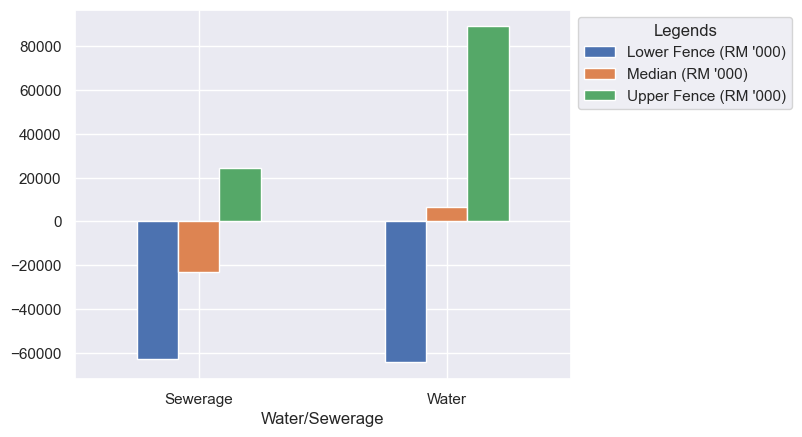

In [58]:
financials_type.plot(y=["Lower Fence (RM '000)","Median (RM '000)","Upper Fence (RM '000)"], kind='bar')
# plt.title("Rainfalls prediction using Method 3 has large median compared to the rest two prediction methods for all states in Malaysia")
# plt.ylabel("Median of Predicted Rainfalls (mm)")
plt.legend(title="Legends", bbox_to_anchor=(1,1), loc="upper left")
plt.xticks(rotation=0)
plt.show()

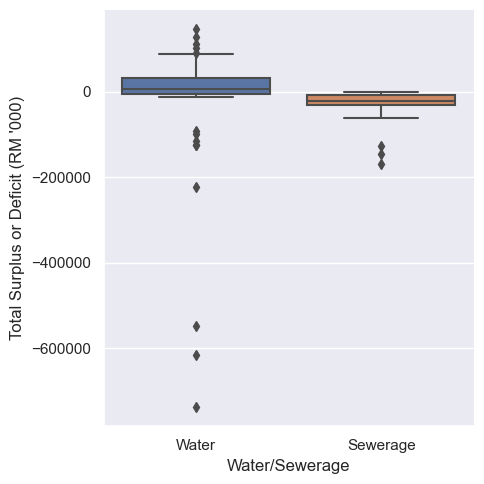

In [77]:
sns.catplot(data=financials, x="Water/Sewerage", y="Total Surplus or Deficit (RM '000)", kind='box')

In [32]:
count_financials_type = financials.groupby('Water/Sewerage').count()
count_financials_type

,State,Year,Total Revenue (RM '000),Total Expenditure (RM '000),Total Surplus or Deficit (RM '000),Total Expenditure/Total Revenue (%)
Water/Sewerage,,,,,,
Sewerage,34,34,34,34,34,34
Water,42,42,42,42,42,42


### by Year

In [53]:
mean_financials_year = round(financials.groupby('Year')["Total Surplus or Deficit (RM '000)"].mean(),3).to_frame()
median_financials_year = round(financials.groupby('Year')["Total Surplus or Deficit (RM '000)"].median(),3)

sd_financials_year = round(financials.groupby('Year')["Total Surplus or Deficit (RM '000)"].apply(np.std),3).to_frame()
iqr_financials_year = round(financials.groupby('Year')["Total Surplus or Deficit (RM '000)"].apply(iqr),3)

q1_financials_year = financials.groupby('Year')["Total Surplus or Deficit (RM '000)"].quantile(q=.25)
q3_financials_year = financials.groupby('Year')["Total Surplus or Deficit (RM '000)"].quantile(q=.75)

lf_financials_year = round((q1_financials_year - (1.5*iqr_financials_year)),3)
uf_financials_year = round((q3_financials_year + (1.5*iqr_financials_year)),3)

print(mean_financials_year)
print()
print(median_financials_year)
print()
print(sd_financials_year)
print()
print(lf_financials_year)
print()
print(uf_financials_year)

      Total Surplus or Deficit (RM '000)
Year                                    
2014                          -39753.200
2015                          -38452.600
2016                          -28224.808

Year
2014   -7552
2015   -6236
2016   -5459
Name: Total Surplus or Deficit (RM '000), dtype: int64

      Total Surplus or Deficit (RM '000)
Year                                    
2014                          120006.284
2015                          155831.125
2016                          132616.524

Year
2014   -81378.50
2015   -89904.00
2016   -65169.25
Name: Total Surplus or Deficit (RM '000), dtype: float64

Year
2014    57481.50
2015    68224.00
2016    50240.75
Name: Total Surplus or Deficit (RM '000), dtype: float64


In [54]:
temp_mean = mean_financials_year["Total Surplus or Deficit (RM '000)"].astype('str')
temp_sd = sd_financials_year["Total Surplus or Deficit (RM '000)"].astype('str')

financials_year = temp_mean.str.cat(temp_sd, sep=" ± ").to_frame().rename(columns={"Total Surplus or Deficit (RM '000)":"Mean ± SD (RM '000)"})
financials_year["Median (RM '000)"] = median_financials_year
financials_year["Lower Fence (RM '000)"] = lf_financials_year
financials_year["Upper Fence (RM '000)"] = uf_financials_year

financials_year

,Mean ± SD (RM '000),Median (RM '000),Lower Fence (RM '000),Upper Fence (RM '000)
Year,,,,
2014,-39753.2 ± 120006.284,-7552,-81378.50,57481.50
2015,-38452.6 ± 155831.125,-6236,-89904.00,68224.00
2016,-28224.808 ± 132616.524,-5459,-65169.25,50240.75


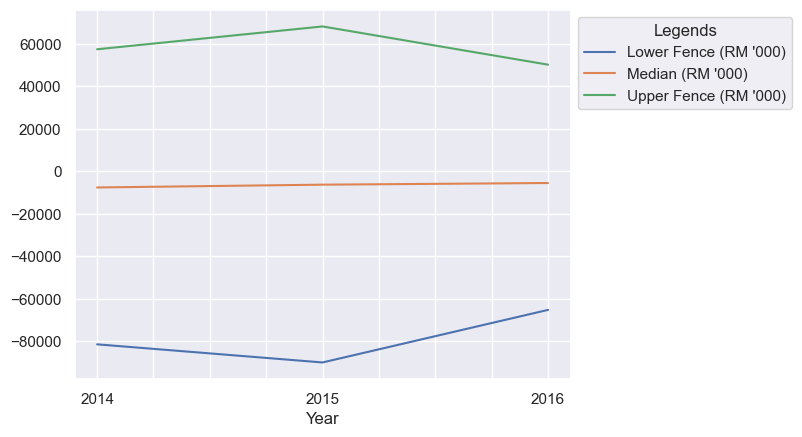

In [55]:
financials_year.plot(y=["Lower Fence (RM '000)","Median (RM '000)","Upper Fence (RM '000)"])
# plt.title("Rainfalls prediction using Method 3 has large median compared to the rest two prediction methods for all states in Malaysia")
# plt.ylabel("Median of Predicted Rainfalls (mm)")
plt.legend(title="Legends", bbox_to_anchor=(1,1), loc="upper left")
plt.show()

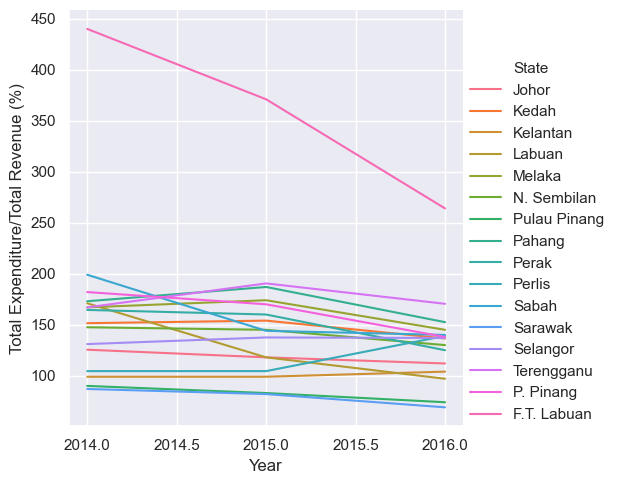

In [15]:
sns.relplot(data=financials, x='Year', y="Total Expenditure/Total Revenue (%)", kind='line', hue='State', ci=None)

In [56]:
count_financials_year = financials.groupby('Year').count()
count_financials_year

,Water/Sewerage,State,Total Revenue (RM '000),Total Expenditure (RM '000),Total Surplus or Deficit (RM '000),Total Expenditure/Total Revenue (%)
Year,,,,,,
2014,25,25,25,25,25,25
2015,25,25,25,25,25,25
2016,26,26,26,26,26,26


### by State

In [39]:
financials["State"].unique()

array(['Johor', 'Kedah', 'Kelantan', 'Labuan', 'Melaka', 'N. Sembilan',
       'Pulau Pinang', 'Pahang', 'Perak', 'Perlis', 'Sabah', 'Sarawak',
       'Selangor', 'Terengganu', 'P. Pinang', 'F.T. Labuan'], dtype=object)

In [40]:
financials['State'] = financials['State'].str.replace("F.T. Labuan","Labuan")
financials['State'] = financials['State'].str.replace("P. Pinang","Pulau Pinang")
financials['State'].unique()

array(['Johor', 'Kedah', 'Kelantan', 'Labuan', 'Melaka', 'N. Sembilan',
       'Pulau Pinang', 'Pahang', 'Perak', 'Perlis', 'Sabah', 'Sarawak',
       'Selangor', 'Terengganu'], dtype=object)

In [41]:
mean_financials_state = round(financials.groupby('State')["Total Surplus or Deficit (RM '000)"].mean(),3).to_frame()
median_financials_state = round(financials.groupby('State')["Total Surplus or Deficit (RM '000)"].median(),3)

sd_financials_state = round(financials.groupby('State')["Total Surplus or Deficit (RM '000)"].apply(np.std),3).to_frame()
iqr_financials_state = round(financials.groupby('State')["Total Surplus or Deficit (RM '000)"].apply(iqr),3)

q1_financials_state = financials.groupby('State')["Total Surplus or Deficit (RM '000)"].quantile(q=.25)
q3_financials_state = financials.groupby('State')["Total Surplus or Deficit (RM '000)"].quantile(q=.75)

lf_financials_state = round((q1_financials_state - (1.5*iqr_financials_state)),3)
uf_financials_state = round((q3_financials_state + (1.5*iqr_financials_state)),3)

In [42]:
temp_mean = mean_financials_state["Total Surplus or Deficit (RM '000)"].astype('str')
temp_sd = sd_financials_state["Total Surplus or Deficit (RM '000)"].astype('str')

financials_state = temp_mean.str.cat(temp_sd, sep=" ± ").to_frame().rename(columns={"Total Surplus or Deficit (RM '000)":"Mean ± SD (RM '000)"})
financials_state["Median (RM '000)"] = median_financials_state
financials_state["Lower Fence (RM '000)"] = lf_financials_state
financials_state["Upper Fence (RM '000)"] = uf_financials_state

financials_state

,Mean ± SD (RM '000),Median (RM '000),Lower Fence (RM '000),Upper Fence (RM '000)
State,,,,
Johor,49176.333 ± 74349.189,36051.5,-235298.500,330759.500
Kedah,-4233.5 ± 23568.886,-7058.0,-93737.500,84904.500
Kelantan,1274.75 ± 1359.348,943.5,-1092.375,3310.625
Labuan,-5000.167 ± 3764.713,-5022.0,-10472.000,914.000
Melaka,-8217.833 ± 16914.651,-6826.0,-72911.375,56621.625
N. Sembilan,-11142.5 ± 15731.251,-9421.5,-71309.875,46349.125
Pahang,-57366.167 ± 45505.265,-53474.0,-223755.875,112505.125
Perak,20578.5 ± 74275.236,15837.0,-271095.750,312176.250
Perlis,2419.0 ± 8046.848,-1006.5,-12728.875,17828.125


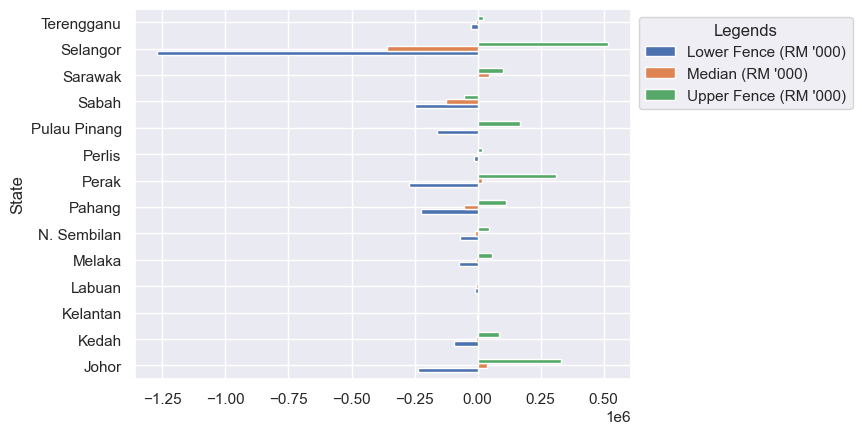

In [59]:
financials_state.plot(y=["Lower Fence (RM '000)","Median (RM '000)","Upper Fence (RM '000)"], kind='barh')
# plt.title("Rainfalls prediction using Method 3 has large median compared to the rest two prediction methods for all states in Malaysia")
# plt.ylabel("Median of Predicted Rainfalls (mm)")
plt.legend(title="Legends", bbox_to_anchor=(1,1), loc="upper left")
plt.show()

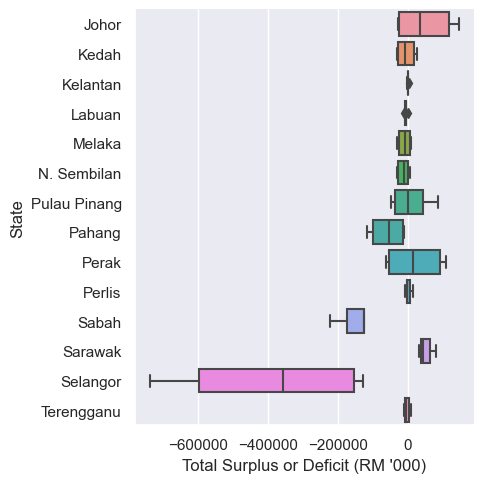

In [70]:
sns.catplot(data=financials, y="State", x="Total Surplus or Deficit (RM '000)", kind='box')
# plt.title("Rainfalls prediction using Method 3 has large median compared to the rest two prediction methods for all states in Malaysia")
# plt.ylabel("Median of Predicted Rainfalls (mm)")

In [43]:
count_financials_state = financials.groupby('State').count()
count_financials_state

,Water/Sewerage,Year,Total Revenue (RM '000),Total Expenditure (RM '000),Total Surplus or Deficit (RM '000),Total Expenditure/Total Revenue (%)
State,,,,,,
Johor,6,6,6,6,6,6
Kedah,6,6,6,6,6,6
Kelantan,4,4,4,4,4,4
Labuan,6,6,6,6,6,6
Melaka,6,6,6,6,6,6
N. Sembilan,6,6,6,6,6,6
Pahang,6,6,6,6,6,6
Perak,6,6,6,6,6,6
Perlis,6,6,6,6,6,6


### overall overview

In [36]:
total_financials_type = financials.groupby('Water/Sewerage')["Total Surplus or Deficit (RM '000)"].sum().sort_values()
print(total_financials_type)
total_financials_year = financials.groupby('Year')["Total Surplus or Deficit (RM '000)"].sum().sort_values()
print(total_financials_year)

Water/Sewerage
Water      -1593319
Sewerage   -1095671
Name: Total Surplus or Deficit (RM '000), dtype: int64
Year
2014   -993830
2015   -961315
2016   -733845
Name: Total Surplus or Deficit (RM '000), dtype: int64


In [37]:
financials_surplus = [fin1 for fin1 in financials["Total Surplus or Deficit (RM '000)"] if fin1>=0]
financials_deficit = [fin2 for fin2 in financials["Total Surplus or Deficit (RM '000)"] if fin2<0]
print("Water/Sewerage reported with financial surplus =",len(financials_surplus))
print("Water/Sewerage reported with financial deficit =",len(financials_deficit))

Water/Sewerage reported with financial surplus = 29
Water/Sewerage reported with financial deficit = 47


In [38]:
over_budget = [fin3 for fin3 in financials["Total Expenditure/Total Revenue (%)"] if fin3>100]
on_budget = [fin4 for fin4 in financials["Total Expenditure/Total Revenue (%)"] if fin4==100]
under_budget = [fin5 for fin5 in financials["Total Expenditure/Total Revenue (%)"] if fin5<100]
print("Water/Sewerage reported over the budget =",len(over_budget))
print("Water/Sewerage reported on the budget =",len(on_budget))
print("Water/Sewerage reported under the budget =",len(under_budget))

Water/Sewerage reported over the budget = 47
Water/Sewerage reported on the budget = 0
Water/Sewerage reported under the budget = 29
